In [ ]:
%matplotlib notebook
from pylab import *
from IPython.display import display, Latex
import ipywidgets as widgets

## <font color='blue'> Bohr's Correspondence Principle</font>

### The Correspondence Principle says that as the quantum number gets larger, the predictions of <font color='blue'>Quantum Mechanics</font> must approach the predictions of <font color='red'>Classical Mechanics</font>.
### How can this be if the quantum wavefunction gets more wiggly with increasing n?

### Answer:  Any real measurement consists of an interaction of a classical probe of some kind with the quantum system.  The probe has the effect of averaging out all of the quantum effects within its finite size...
### Explore this effect for the 1-dimensional Particle in a Box wavefunctions below.

<IPython.core.display.Javascript object>


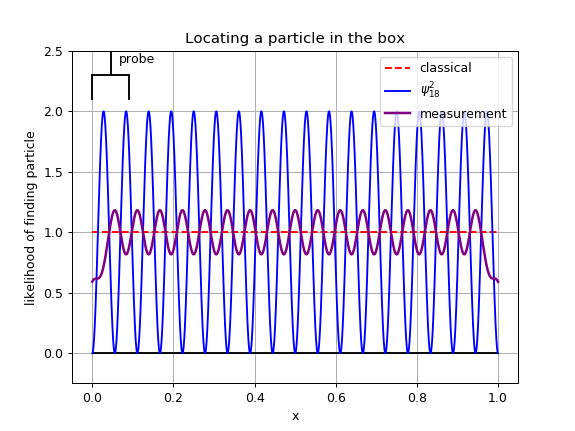

In [49]:
# set up wavefunctions, outline of well

figure("Correspondence Principle")
limits = (0, 1)
nPoints = 5000
x = linspace(*limits, nPoints)

def wf(x, n = 1, a = 1):
    '''return nth wavefunction'''
    return sqrt(2/a) * sin(n*pi*x/a)
        
def running(y, N = 100):
    '''Compute running average over N points'''
    yCalc = hstack((zeros(N), y, zeros(N)))
    yOut = cumsum(yCalc)
    yNew = (yOut[N:] - yOut[:-N])/N
    nStart = int(N/2)
    nEnd = int(N/2) if N%2 == 0 else int(N/2) + 1
    return yNew[nStart:-nEnd]

def plotPDF(n1 = 1, width = 0.1, showAve = False ):
    '''Plot quantum and classical pdf'''
    ax = gca()
    ax.cla()
    y1 = wf(x, n1)**2
    plot([0,1], [1,1], 'r--', label = 'classical')
    Nbox = int(round(width*nPoints,0))
    
    plot(x, y1, color = 'blue', label = r'$\psi_{%d}^2$' % n1)
    if showAve:
        yAve = running(y1, Nbox)
        plot(x, yAve, color = 'purple', linewidth = 2, label = "measurement")
    
    hlines([0,], xmin = 0, xmax = 1, color = 'black')
    ylim([-0.25, 2.5])
    xlabel('x')
    ylabel('likelihood of finding particle')
    title("Locating a particle in the box")
    legend()
    grid()


def plotProbe(width = 0.1):
    '''Create probe in plot window'''
    prongx = array([0, 0])
    prongy = array([2.1, 2.3])
    blade = array([0, width])
    handle = array([width/2, width/2])
    plot(prongx, prongy, 'k')
    plot(prongx+width, prongy, 'k')
    plot(blade, [2.3, 2.3], 'k')
    plot(handle, [2.3, 2.5], 'k')
    text( width/2 + 0.02, 2.4, "probe")
    
plotPDF()
plotProbe()
         
N = 200
drop_layout = widgets.Layout(width = '75px')
check_layout = widgets.Layout(width = '200px')
style = {'description_width': 'initial'}
label1 = widgets.HTML(value = "<font color=blue><b>PIB wavefunction   </b></font>")
drop1 = widgets.Dropdown(options = list(range(1,N+1)), layout = drop_layout)
slider = widgets.FloatSlider(value = 0.1, min=0.01, max=1.0, step = 0.01, description = "Probe",
                            orientation = 'horizontal', readout = True, readout_format = '.2f')

check = widgets.Checkbox(value=False, description = "Show Ave", layout = check_layout)
check.width = '150px'

def select_data(change):
    n1 = drop1.value
    plotPDF(n1, width = slider.value, showAve = check.value)
    plotProbe(width = slider.value)
    
drop1.observe(select_data, names='value')
check.observe(select_data, names='value')
slider.observe(select_data, names='value')
widgets.HBox([label1, drop1, slider,  check])

In [ ]:
%%html
<style>
div.input{
    display:none;
}
</style>